# Exercise 3:

Use and experience methods from previous lessons with given data. Try to search for other pandas methods to analyze the data such as `groupby()` and `query()`. Write functions for repetitive tasks.

TODOs:
- See the spread of pandemic in different countries.
- Plot graphs for Reproduction Rate for different countries side by side or in the same graph.
- Check correlation between deaths and recoveries.
- Compare recoveries between countries.
- Are there any outliers (anomalies)?

[Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)

In [11]:
# You can find covid related data under project's data folder 
base_url = "../data/covid/"
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
infected_dataset_url = "data/infected.csv"
recovered_dataset_url = "data/recovered.csv"
deaths_dataset_url = "data/deaths.csv"

In [17]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")
deaths_df = pd.read_csv("time_series_covid19_deaths_global.csv")

In [ ]:
def melt_df(df, value_name):# Uzun formata çevirme fonksiyonu
    df_melted = df.drop(["Lat", "Long"], axis=1).melt(
        id_vars=["Province/State", "Country/Region"], var_name="Date", value_name=value_name
    )
    df_melted["Date"] = pd.to_datetime(df_melted["Date"])
    return df_melted

In [20]:
confirmed = melt_df(confirmed_df, "Confirmed")
recovered = melt_df(recovered_df, "Recovered")
deaths = melt_df(deaths_df, "Deaths")

C:\Users\Dell\AppData\Local\Temp\ipykernel_12544\1949473733.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted["Date"] = pd.to_datetime(df_melted["Date"])
C:\Users\Dell\AppData\Local\Temp\ipykernel_12544\1949473733.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted["Date"] = pd.to_datetime(df_melted["Date"])
C:\Users\Dell\AppData\Local\Temp\ipykernel_12544\1949473733.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted["Date"] = pd.to_datetime(df_melted["Date"])


In [21]:
df = confirmed.merge(recovered, on=["Province/State", "Country/Region", "Date"])
df = df.merge(deaths, on=["Province/State", "Country/Region", "Date"])

In [22]:
# 2. Üreme oranı (Reproduction Rate) grafiği
df.sort_values(["Country/Region", "Date"], inplace=True)
df["Reproduction Rate"] = df.groupby("Country/Region")["Confirmed"].pct_change().fillna(0) + 1


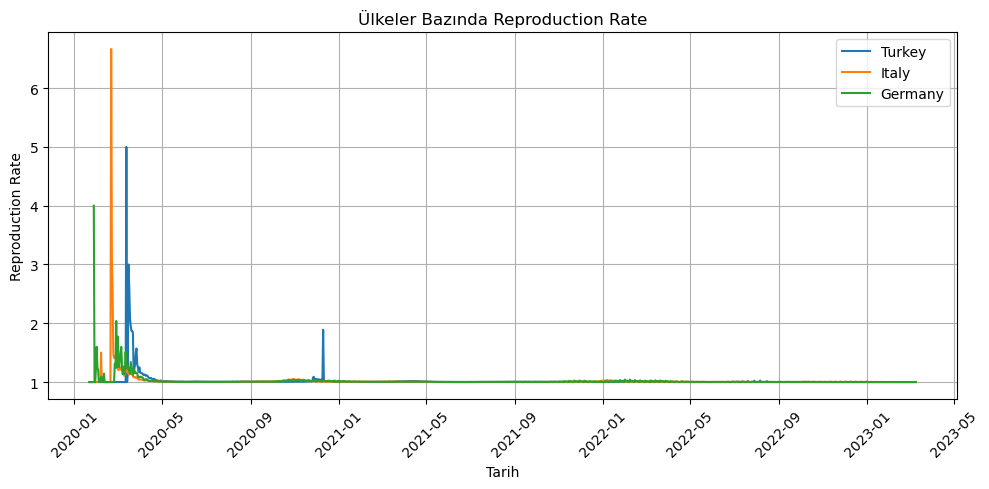

In [23]:
ülkeler = ["Turkey", "Italy", "Germany"]
plt.figure(figsize=(10, 5))
for ülke in ülkeler:
    ülke_df = df[df["Country/Region"] == ülke]
    plt.plot(ülke_df["Date"], ülke_df["Reproduction Rate"], label=ülke)

plt.title("Ülkeler Bazında Reproduction Rate")
plt.xlabel("Tarih")
plt.ylabel("Reproduction Rate")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
# 3. Ölüm ve iyileşme  korelasyon
print("\n📈 Ölüm ve iyileşme arasındaki korelasyon:")
print(df[["Deaths", "Recovered"]].corr())


📈 Ölüm ve iyileşme arasındaki korelasyon:
             Deaths  Recovered
Deaths     1.000000   0.204794
Recovered  0.204794   1.000000


In [25]:
print("\n💚 Toplam iyileşme sayısına göre ilk 10 ülke:")
print(df.groupby("Country/Region")["Recovered"].max().sort_values(ascending=False).head(10))


💚 Toplam iyileşme sayısına göre ilk 10 ülke:
Country/Region
India        30974748
Brazil       17771228
US            6298082
Russia        5609682
Turkey        5478185
Argentina     4615834
Colombia      4615354
Italy         4144608
Germany       3659260
Iran          3444798
Name: Recovered, dtype: int64


In [26]:

numeric_cols = df[["Confirmed", "Deaths", "Recovered"]].fillna(0)
z_scores = np.abs(stats.zscore(numeric_cols))
outliers = df[(z_scores > 3).any(axis=1)]
print(f"\n🚨 Tespit edilen aykırı değer sayısı: {len(outliers)}")


🚨 Tespit edilen aykırı değer sayısı: 7958


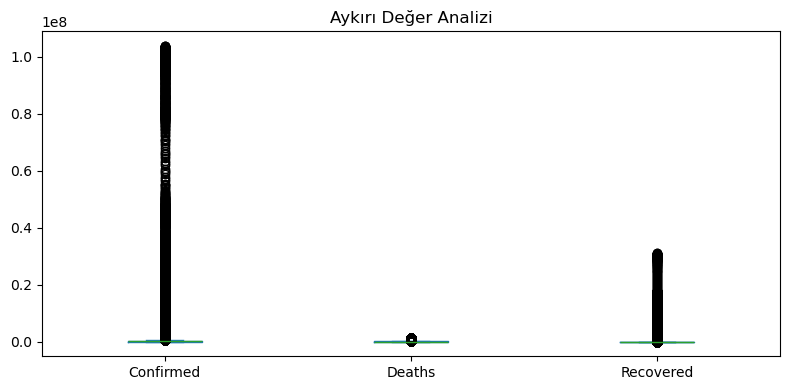

In [27]:
# Boxplot ile görselleştir
df[["Confirmed", "Deaths", "Recovered"]].plot(kind='box', figsize=(8, 4), title="Aykırı Değer Analizi")
plt.tight_layout()
plt.show()